#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**Task: 1.Basic Data Exploration**

In [ ]:
#Identify the number of rows and columns in the dataset
df.shape

(148654, 13)

In [ ]:
#determine the data types of each column
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [ ]:
#check for missing values in each column.
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**Task: 2.Descriptive Statistics**

In [ ]:
#Calculate basic statistics mean ,minimum, and maximum salary, and find the standard deviation
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [ ]:
#Calculate basic statistics median
df['TotalPay'].median()

71426.60999999999

In [ ]:
#Calculate basic statistics mode
df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

In [ ]:
#determine the range of salaries
Rang = df['TotalPay'].max() - df['TotalPay'].min()
Rang

568213.56

**Task: 3.Data Cleaning**

In [ ]:
#The 'Notes' and 'Status' columns had a large number of missing values
#so i decided to remove them
df = df.drop(['Notes', 'Status'], axis=1)

In [ ]:
#for the 'BasePay' and 'Benefits' missing values i decided to impute missing values with mean
#because it helps to fill in the missing information without affecting the data
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

In [ ]:
#For 'OvertimePay' and 'OtherPay' i decided to drop rows with missing values
#because the number of missing values small and these columns important for analysis
df = df.dropna(subset=['OvertimePay', 'OtherPay'])

Task: 4.Basic Data Visualization

In [ ]:
import matplotlib.pyplot as plt

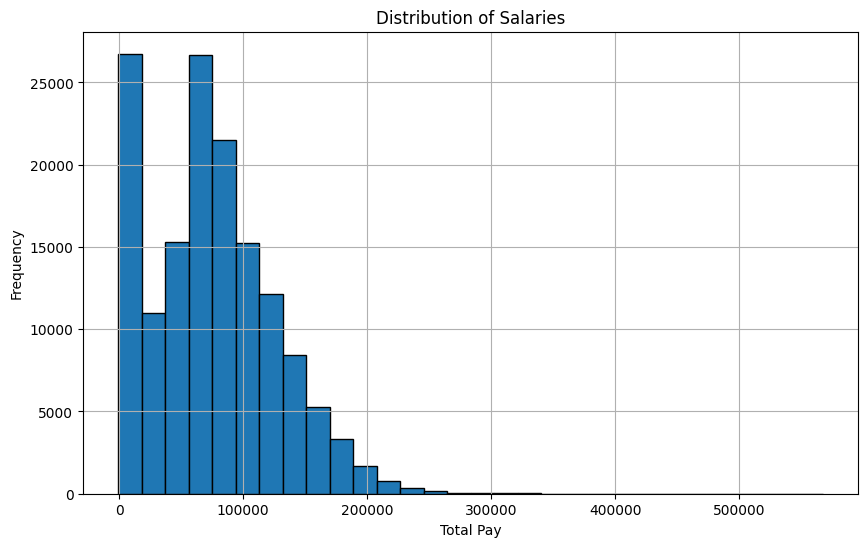

In [ ]:
#histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df['JobTitle'].nunique()

2158

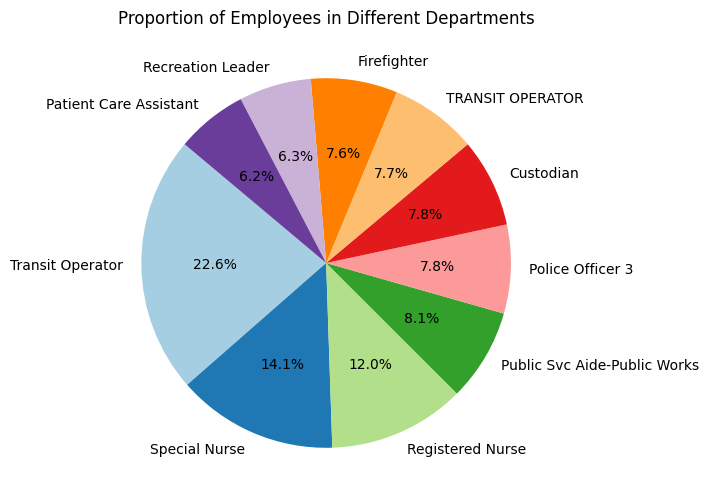

In [ ]:
#pie chart for the proportion of employees in different departments
#i decided to Visualize the top 10 departments because we have 2158 unique value
department_counts = df['JobTitle'].value_counts().head(10)
labels = department_counts.index
sizes = department_counts.values

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Employees in Different Departments')
plt.show()

Task: 5.Grouped Analysis

In [ ]:
grouped_data = df.groupby(['Year', 'JobTitle'])

#summary statistics (mean)
summary_statistics = grouped_data['TotalPay'].mean()

print(summary_statistics)

Year  JobTitle                      
2011  ACCOUNT CLERK                      44035.664337
      ACCOUNTANT                         47429.268000
      ACCOUNTANT INTERN                  29031.742917
      ACUPUNCTURIST                      67594.400000
      ADMINISTRATIVE ANALYST             63954.867527
                                            ...      
2014  Wire Rope Cable Maint Sprv        190575.900000
      Worker's Comp Supervisor 1         56689.446667
      Worker's Compensation Adjuster     70636.455385
      X-Ray Laboratory Aide              51211.566857
      Youth Comm Advisor                 36465.910000
Name: TotalPay, Length: 4136, dtype: float64


Task: 6.Simple Correlation Analysis

In [ ]:
#Identify any correlation between salary and another numerical column
df['TotalPay'].corr(df['BasePay'])

0.9505423082497902

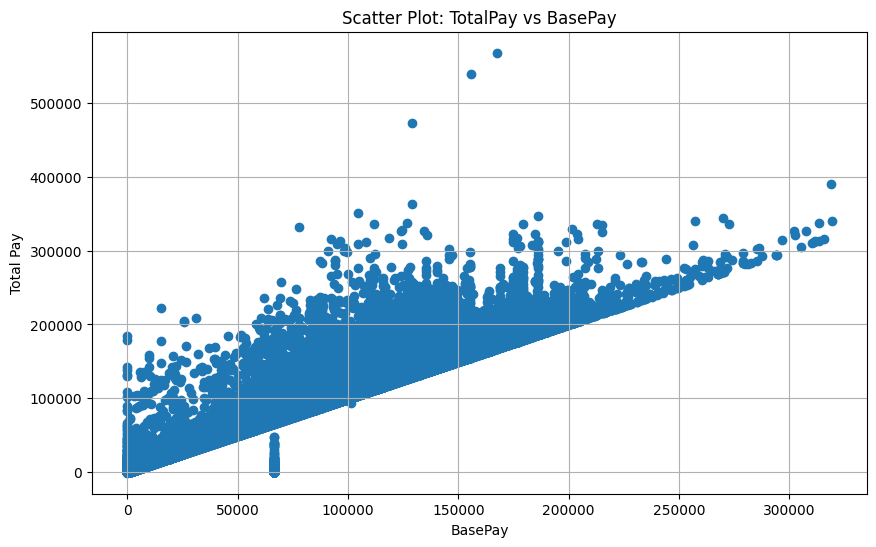

In [ ]:
#plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('Total Pay')
plt.grid(True)
plt.show()

**Task: 7.Summary of Insights**

Report:

The dataset contains 148654 rows and 13 columns.

The data types vary including integers and floats and objects.

Columns such as 'BasePay' and 'OvertimePay' and 'OtherPay' and 'Benefits' have missing values.

The mean salary is 74768$ with a standard deviation of 50517$.

The median salary is 71426.61$.

The range of salaries is 568213.56$.

The 'Notes' and 'Status' columns with a large number of missing values, were removed as they didn't contribute significantly to the analysis.

Missing values in 'BasePay' and 'Benefits' were imputed with the mean to maintain the overall data distribution.

Rows with missing values in 'OvertimePay' and 'OtherPay' were dropped due to their small number and importance for analysis.

Visualizations such as histograms and bar charts and pie charts were created to provide insights into the distribution of salaries and the proportion of employees in different departments.

The data was grouped by 'Year' and 'JobTitle' and the average salary for each group was calculated This allows for a comparison of average salaries across different years and job titles.

A correlation analysis between 'TotalPay' and 'BasePay' was conducted revealing a strong positive correlation of approximately 0.95 This indicates a significant relationship between the total pay and base pay of employees.

I think we investigate negative salaries in the 'TotalPay' column to understand if there are anomalies or errors in the data and also we explore Outliers by Examine the distribution of salaries for potential outliers as extreme values might impact the analysis.

# Good Luck!